In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from hmmlearn.hmm import GaussianHMM
import pickle
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from math import floor


sys.path.insert(0, '../')
from scripts.tracking import TeamTracking, MatchTracking

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_directory = '../data/tracking'
dt = 0.04

In [3]:
match_list = ['g2312135_SecondSpectrum_tracking-produced.jsonl',
 'g2312201_SecondSpectrum_tracking-produced.xml',
 'g2312213_SecondSpectrum_tracking-produced.jsonl',
 'g2312166_SecondSpectrum_tracking-produced.jsonl',
 'g2312152_SecondSpectrum_tracking-produced.jsonl',
 'g2312201_SecondSpectrum_tracking-produced.jsonl',]
# 'g2312183_SecondSpectrum_tracking-produced.jsonl']

In [4]:
tracking_list = list()

for match in match_list:
    try:
        df_unstructured = pd.read_json(os.path.join(data_directory,
                                                    match),
                                       lines=True
                                       )
    except:
        continue
    tracking_data = (TeamTracking(df_unstructured_tracking=df_unstructured,
                                  isHomeTeam=True)
                     .calculate_acceleration()
                     .calculate_metabolic_cost()
                     ).df_tracking[['period',
                                    'gameClock',
                                    'optaId',
                                    'metabolic_cost',
                                    'metabolic_power', 'speed']]

    match_id = match.split('_')[0][1:]
    tracking_data['match'] = match_id

    print('Processed  {}'.format(match_id))
    tracking_list.append(tracking_data)
    del tracking_data

Processed  2312135
Processed  2312213
Processed  2312166
Processed  2312152
Processed  2312201


In [5]:
df_tot = pd.concat(tracking_list, axis=0)
del tracking_list
df_tot['optaId'] = df_tot['optaId'].astype('category')
df_tot['match'] = df_tot['match'].astype('category')

In [6]:
df_tot['trace_id'] = (df_tot['match'].astype(str)
                      +'_'+df_tot['period'].astype(str)
                      +'_'+df_tot['optaId'].astype(str)).astype('category')

In [7]:
df_tot = df_tot.dropna()
lengths = df_tot.reset_index().groupby('trace_id').count()['gameClock'].values
X = df_tot[['metabolic_cost', 'metabolic_power']].values

In [8]:
scaler = StandardScaler()

X_tr = np.clip(scaler.fit_transform(X),a_min=-5, a_max=5)

In [ ]:
aic = []
bic = []
lls = []
ns = [2, 3, 4, 5, 6]
rs = check_random_state(42)

for n in ns:
    best_ll = None
    best_model = None
    for i in range(5):
        h = GaussianHMM(n, random_state=rs)
        h.fit(X_tr)
        score = h.score(X_tr)
        if not best_ll or best_ll < best_ll:
            best_ll = score
            best_model = h
    lls.append(best_model.score(X_tr))
    


fig, ax = plt.subplots()

ln3 = ax.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines)
ax.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()


/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

In [9]:
model = GaussianHMM(n_components=3)
model.fit(X_tr, lengths=lengths)

with open(os.path.join('../models', 'hmm_3components_matches_scaled_2channels.pkl'), 'wb') as f:
    pickle.dump(model, f)

model = GaussianHMM(n_components=4)
model.fit(X_tr, lengths=lengths)

with open(os.path.join('../models', 'hmm_4components_matches_scaled_2channels.pkl'), 'wb') as f:
    pickle.dump(model, f)
    
model = GaussianHMM(n_components=5)
model.fit(X_tr, lengths=lengths)

with open(os.path.join('../models', 'hmm_5components_matches_scaled_2channels.pkl'), 'wb') as f:
    pickle.dump(model, f)

    
model = GaussianHMM(n_components=6)
model.fit(X_tr, lengths=lengths)

with open(os.path.join('../models', 'hmm_6components_matches_scaled_2channels.pkl'), 'wb') as f:
    pickle.dump(model, f)

/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/florent/Documents/mancity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

# Subsampling

In [14]:
df_tot['gameClock_seconds'] = df_tot['gameClock'].apply(floor)

In [19]:
df_tot['dt_metabolic_cost'] = df_tot['metabolic_cost']*dt
df_tot['dt_metabolic_power'] = df_tot['metabolic_power']*dt

df_reduced = (df_tot[['trace_id',
                      'gameClock_seconds',
                      'dt_metabolic_cost',
                      'dt_metabolic_power']]
              .groupby(['trace_id', 'gameClock_seconds'])
              .sum()
              .reset_index()
              )
df_reduced.to_pickle(os.path.join(data_directory, 'df_train.pkl'))

In [20]:
lengths = df_reduced.reset_index().groupby('trace_id').count()['gameClock_seconds'].values
X = df_reduced[['dt_metabolic_cost', 'dt_metabolic_power']].values

In [21]:
scaler = StandardScaler()

X_tr = np.clip(scaler.fit_transform(X),a_min=-5, a_max=5)

In [27]:
lls = []
ns = [2, 3, 4, 5, 6, 7, 8, 9]
rs = check_random_state(42)

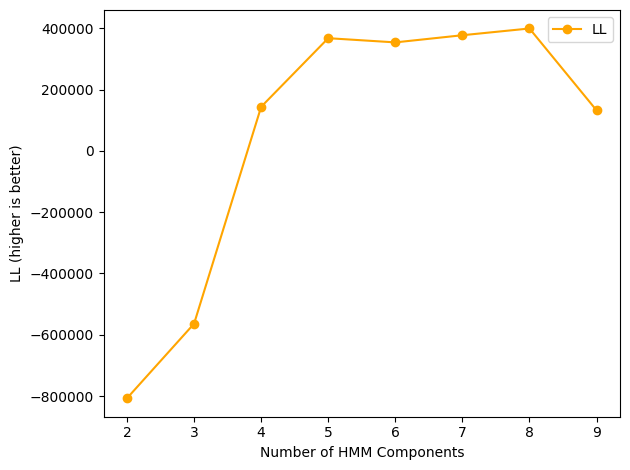

In [28]:
for n in ns:
    best_ll = None
    best_model = None
    for i in range(5):
        h = GaussianHMM(n, random_state=rs)
        h.fit(X_tr)
        score = h.score(X_tr)
        if not best_ll or best_ll < best_ll:
            best_ll = score
            best_model = h
    
    lls.append(best_model.score(X_tr))
    with open('hmm_{}components_matches_scaled_2channels_sec.pkl'.format(n), 'wb') as f:
        pickle.dump(best_model, f)


fig, ax = plt.subplots()

ln3 = ax.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines)
ax.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()

## Model Selection

In [30]:
with open(os.path.join('hmm_3components_matches_scaled_2channels_sec.pkl'), 'rb') as f:
    model_3 = pickle.load(f)
    
with open(os.path.join( 'hmm_4components_matches_scaled_2channels_sec.pkl'), 'rb') as f:
    model_4 = pickle.load(f)
    
with open(os.path.join('hmm_5components_matches_scaled_2channels_sec.pkl'), 'rb') as f:
    model_5 = pickle.load(f)
with open(os.path.join('hmm_6components_matches_scaled_2channels_sec.pkl'), 'rb') as f:
    model_6 = pickle.load(f)

In [32]:
df_reduced.loc[:,['scaled_cost', 'scaled_power']] = X_tr

In [34]:
df_reduced['states_3'] = model_3.predict(X_tr, lengths=lengths)
df_reduced['states_4'] = model_4.predict(X_tr, lengths=lengths)
df_reduced['states_5'] = model_5.predict(X_tr, lengths=lengths)
df_reduced['states_6'] = model_6.predict(X_tr, lengths=lengths)

(0.0, 40.0)

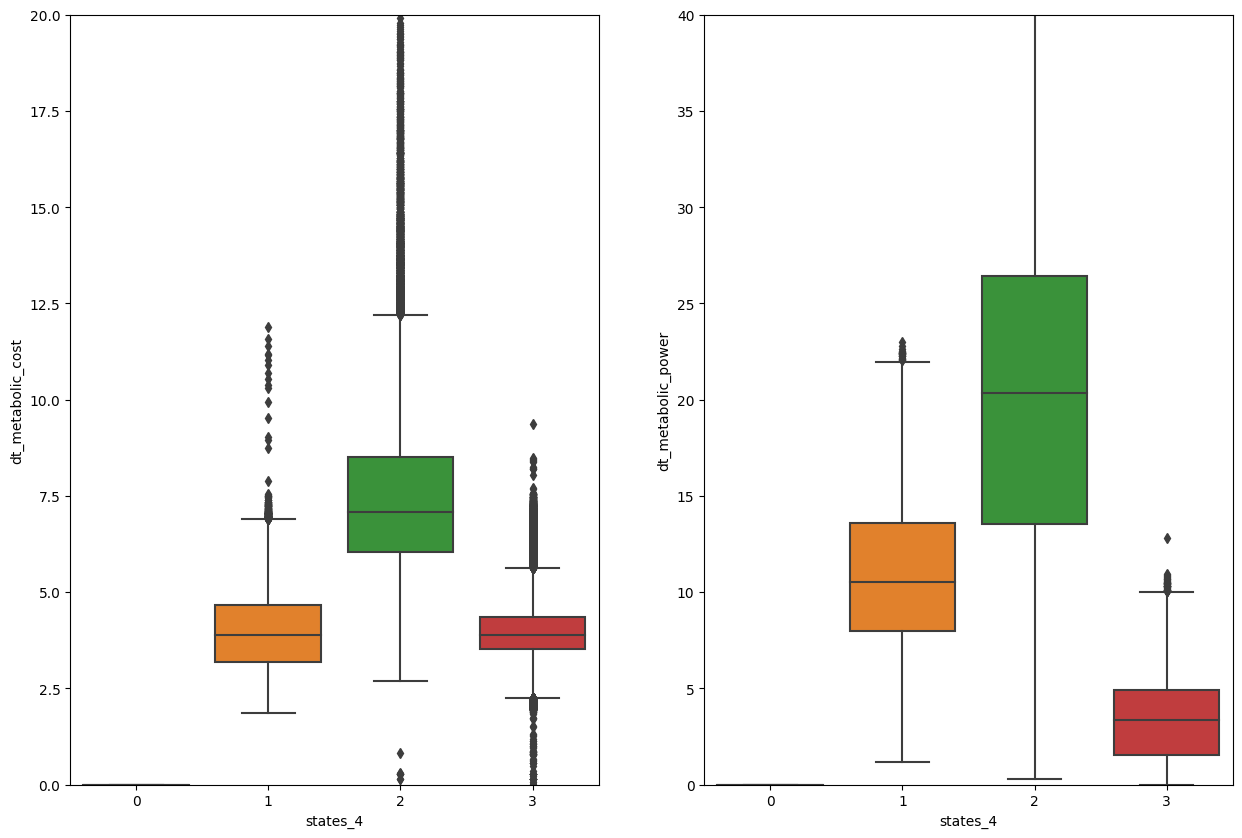

In [43]:
fig, ax_list = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(df_reduced, x='states_4', y='dt_metabolic_cost', ax=ax_list[0])
ax_list[0].set_ylim([0,20])
sns.boxplot(df_reduced, x='states_4', y='dt_metabolic_power', ax=ax_list[1])
ax_list[1].set_ylim([0,40])

(0.0, 40.0)

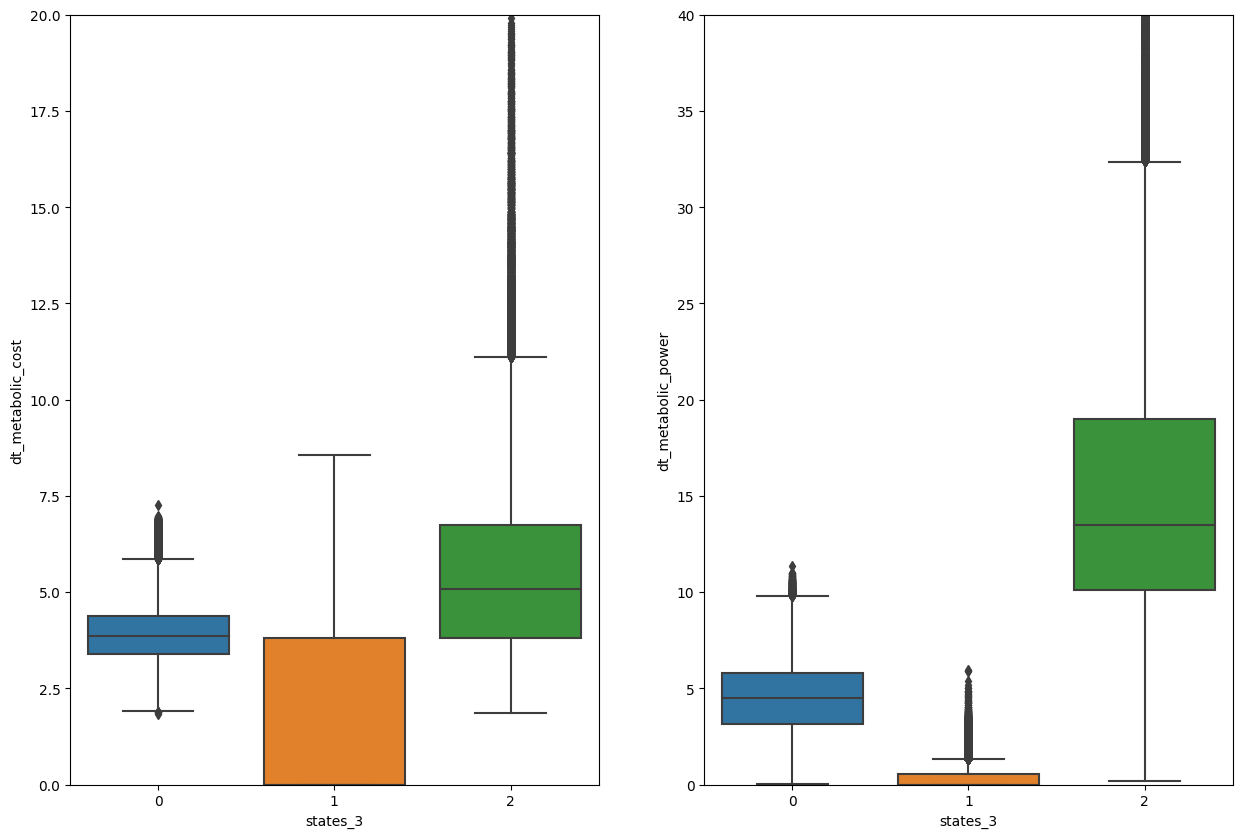

In [44]:
fig, ax_list = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(df_reduced, x='states_3', y='dt_metabolic_cost', ax=ax_list[0])
ax_list[0].set_ylim([0,20])
sns.boxplot(df_reduced, x='states_3', y='dt_metabolic_power', ax=ax_list[1])
ax_list[1].set_ylim([0,40])

(0.0, 40.0)

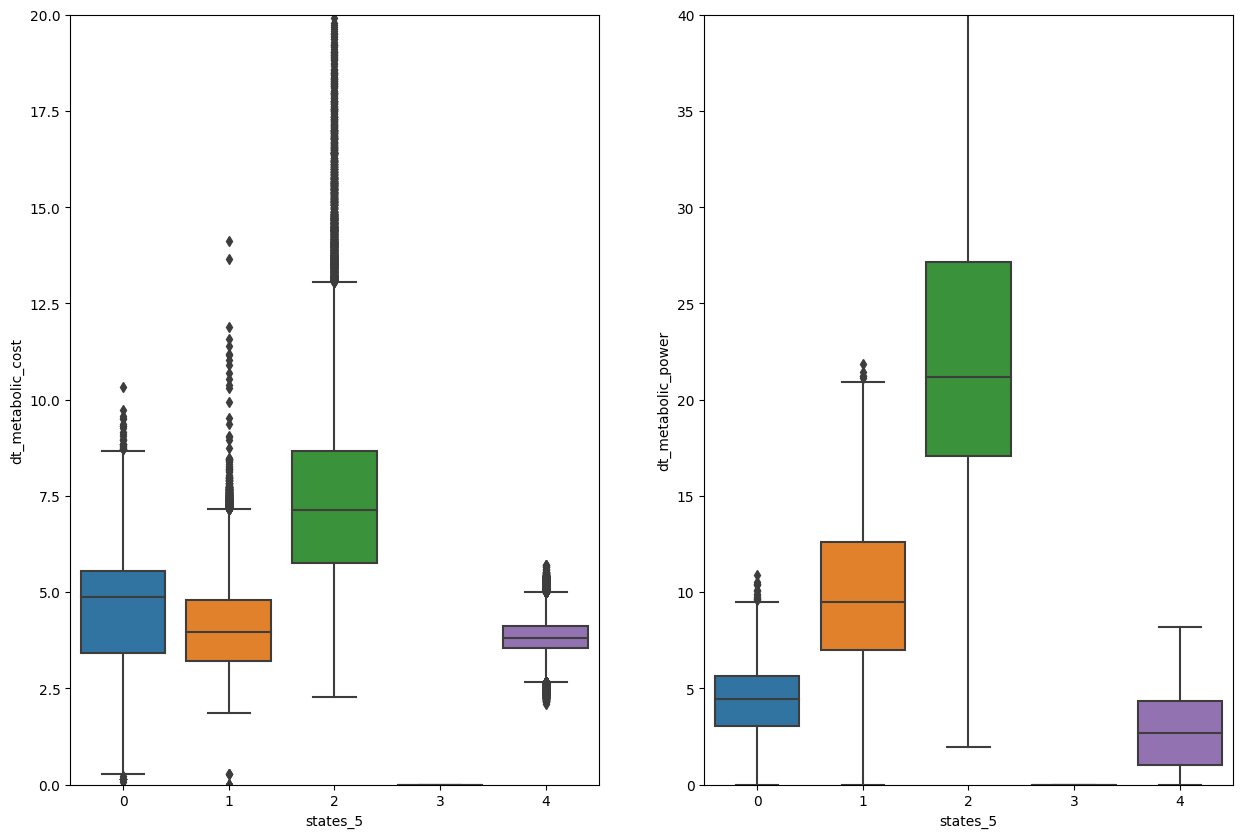

In [45]:
fig, ax_list = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(df_reduced, x='states_5', y='dt_metabolic_cost', ax=ax_list[0])
ax_list[0].set_ylim([0,20])
sns.boxplot(df_reduced, x='states_5', y='dt_metabolic_power', ax=ax_list[1])
ax_list[1].set_ylim([0,40])

(0.0, 40.0)

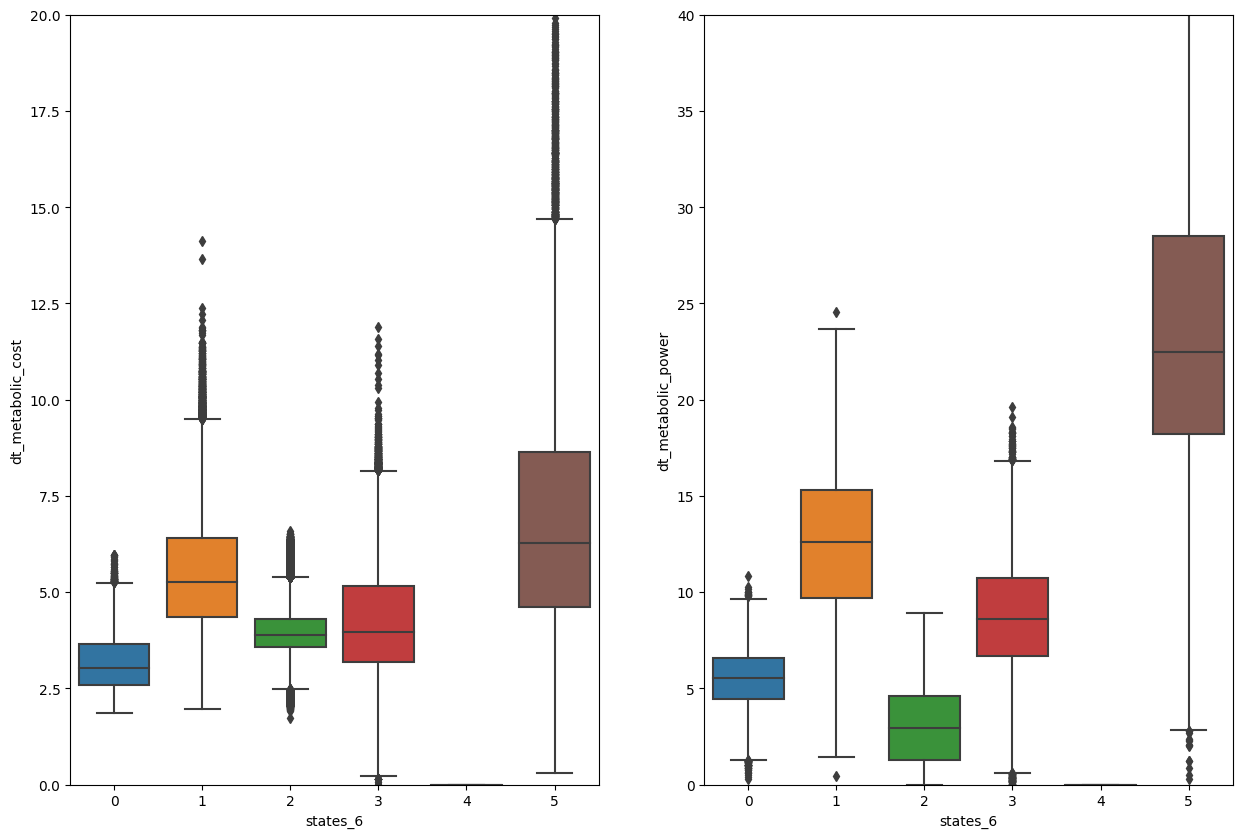

In [46]:
fig, ax_list = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(df_reduced, x='states_6', y='dt_metabolic_cost', ax=ax_list[0])
ax_list[0].set_ylim([0,20])
sns.boxplot(df_reduced, x='states_6', y='dt_metabolic_power', ax=ax_list[1])
ax_list[1].set_ylim([0,40])

Let's select the model with 5 states high intensity is state 2

# Exploitation

In [79]:
df_reduced = pd.read_pickle(os.path.join(data_directory, 'df_train.pkl'))
lengths = df_reduced.reset_index().groupby('trace_id').count()['gameClock_seconds'].values
X = df_reduced[['dt_metabolic_cost', 'dt_metabolic_power']].values

scaler = StandardScaler()
X_tr = np.clip(scaler.fit_transform(X),a_min=-5, a_max=5)

with open(os.path.join('hmm_5components_matches_scaled_2channels_sec.pkl'), 'rb') as f:
    model_5 = pickle.load(f)
    
df_reduced['states_5'] = model_5.predict(X_tr, lengths=lengths)

In [80]:
df_reduced

,trace_id,gameClock_seconds,dt_metabolic_cost,dt_metabolic_power,states_5
0,2312135_1_14772,0,5.626131,2.118286,1
1,2312135_1_14772,1,5.751151,5.260922,0
2,2312135_1_14772,2,3.633078,4.445977,4
3,2312135_1_14772,3,2.700149,1.314135,4
4,2312135_1_14772,4,4.453390,2.124976,0
...,...,...,...,...,...
383370,2312213_2_96535,3062,0.000000,0.000000,3
383371,2312213_2_96535,3063,0.000000,0.000000,3
383372,2312213_2_96535,3064,0.000000,0.000000,3
383373,2312213_2_96535,3065,0.000000,0.000000,3


In [81]:
df_reduced['is_high_intensity'] = (df_reduced['states_5']==2)*1

In [82]:
df_reduced['time_at_high_intensity'] = (df_reduced
 .groupby('trace_id', group_keys=False)['is_high_intensity']
 .cumsum()
 .rename('time_at_high_intensity')
)

<Axes: xlabel='gameClock_seconds', ylabel='time_at_high_intensity'>

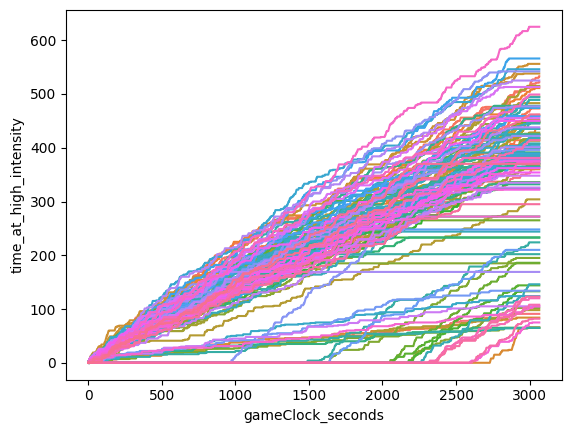

In [83]:
sns.lineplot(df_reduced, x='gameClock_seconds', y='time_at_high_intensity', hue='trace_id', legend=False)

In [84]:
df_reduced['splited_id'] = df_reduced['trace_id'].astype(str).str.split('_')
df_reduced['match_id'] = df_reduced['splited_id'].apply(lambda x: x[0])
df_reduced['period'] = df_reduced['splited_id'].apply(lambda x: x[1])
df_reduced['optaId'] = df_reduced['splited_id'].apply(lambda x: x[2])

In [85]:
match_df = (df_reduced.groupby(['match_id', 'period','optaId'])['gameClock_seconds'].min()==0).reset_index()

In [86]:
(df_reduced.groupby(['match_id', 'period','optaId'], group_keys=False)['gameClock_seconds'].agg(['min', 'max']))

min   max
match_id period optaId           
2312135  1      14772     0  3066
                174349    0  3066
                186022    0  3066
                186043    0  3066
                191726    0  3066
...                     ...   ...
2312213  2      457401    0  3066
                459038    0  3066
                463306    0  3066
                96385     0  3066
                96535     0  3066

[125 rows x 2 columns]

In [87]:
lengths

array([3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067, 3067,
       3067, 3067, 3067, 3067])

## Full match 

In [14]:
fdm_list = list()

for match in match_list:
    try:
        df_unstructured = pd.read_json(os.path.join(data_directory,
                                                    match),
                                       lines=True
                                       )
    except:
        continue

    tracking_data_home = (TeamTracking(df_unstructured_tracking=df_unstructured,
                                       isHomeTeam=True)
                          ).df_tracking[['period',
                                         'gameClock',
                                         'optaId']]
    fdm_home = (tracking_data_home.groupby(['period',
                                          'optaId'])[['gameClock']]
                .agg(['min', 'max']))
    del tracking_data_home


    fdm_home['is_home'] = True

    match_id = match.split('_')[0][1:]
    fdm_home['match'] = match_id
    
    print('Processed  {}'.format(match_id))
    fdm_list.append(fdm_home)
    
df_fdm = pd.concat(fdm_list, axis=0)
df_fdm = df_fdm.reset_index()
df_fdm.columns = df_fdm.columns.to_flat_index()
df_fdm.columns = pd.Index(['_'.join(_) if _[1] else _[0] for _ in df_fdm.columns.values])

Processed  2312135
Processed  2312213
Processed  2312166
Processed  2312152
Processed  2312201


In [23]:
df_length = df_fdm.groupby(['match', 'period'])['gameClock_max'].max().reset_index()
df_length

,match,period,gameClock_max
0,2312135,1,3066.64
1,2312135,2,2997.48
2,2312152,1,3003.20
3,2312152,2,2944.84
4,2312166,1,2761.72
5,2312166,2,3005.00
6,2312201,1,2880.88
7,2312201,2,2882.04
8,2312213,1,2829.24
9,2312213,2,3027.24


In [25]:
df_fdm

,period,optaId,gameClock_min,gameClock_max,is_home,match
0,1,14772,0.0,3066.64,True,2312135
1,1,96385,0.0,3066.64,True,2312135
2,1,96535,0.0,3066.64,True,2312135
3,1,174349,0.0,3066.64,True,2312135
4,1,186022,0.0,3066.64,True,2312135
...,...,...,...,...,...,...
120,2,192194,0.0,2882.04,True,2312201
121,2,242633,0.0,2882.04,True,2312201
122,2,447080,0.0,2882.04,True,2312201
123,2,459038,0.0,970.20,True,2312201


In [75]:
df_fdm['start_period'] = df_fdm.apply(lambda row: ((row['gameClock_min'] == 0.0)),
                                      axis=1,
                                      )

In [76]:
df_fdm['end_period'] = (df_fdm.apply(lambda row: (row['gameClock_max'] ==
                                                  df_length.loc[(df_length['match'] == row['match']) &
                                                                (df_length['period']
                                                                 == row['period']),
                                                                'gameClock_max']),
                                     axis=1,
                                     )
                        ).sum(axis=1)

In [77]:
df_fdm['full_match'] = df_fdm['start_period']&df_fdm['end_period']

In [78]:
df_fdm

,period,optaId,gameClock_min,gameClock_max,is_home,match,full_match,start_period,end_period
0,1,14772,0.0,3066.64,True,2312135,True,True,1.0
1,1,96385,0.0,3066.64,True,2312135,True,True,1.0
2,1,96535,0.0,3066.64,True,2312135,True,True,1.0
3,1,174349,0.0,3066.64,True,2312135,True,True,1.0
4,1,186022,0.0,3066.64,True,2312135,True,True,1.0
...,...,...,...,...,...,...,...,...,...
120,2,192194,0.0,2882.04,True,2312201,True,True,1.0
121,2,242633,0.0,2882.04,True,2312201,True,True,1.0
122,2,447080,0.0,2882.04,True,2312201,True,True,1.0
123,2,459038,0.0,970.20,True,2312201,False,True,0.0


In [89]:
df_fdm = df_fdm.rename(columns={"match":'match_id'})

In [96]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383375 entries, 0 to 383374
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   trace_id                383375 non-null  category
 1   gameClock_seconds       383375 non-null  int64   
 2   dt_metabolic_cost       383375 non-null  float64 
 3   dt_metabolic_power      383375 non-null  float64 
 4   states_5                383375 non-null  int64   
 5   is_high_intensity       383375 non-null  int64   
 6   time_at_high_intensity  383375 non-null  int64   
 7   splited_id              383375 non-null  object  
 8   match_id                383375 non-null  int64   
 9   period                  383375 non-null  int64   
 10  optaId                  383375 non-null  int64   
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 29.6+ MB


In [98]:
df_fdm['match_id'] = df_fdm['match_id'].astype('int')

In [99]:
df_reduced['match_id'] = df_reduced['match_id'].astype('int')
df_reduced['period'] = df_reduced['period'].astype('int')
df_reduced['optaId'] = df_reduced['optaId'].astype('int')

In [101]:
df_reduced = df_reduced.merge(df_fdm[['match_id', 'period', 'optaId', 'full_match']])

In [102]:
df_reduced.full_match.value_counts()

True     291365
False     92010
Name: full_match, dtype: int64

In [107]:
df_traj = (df_reduced
           .loc[df_reduced['full_match'], ['optaId', 'gameClock_seconds', 'time_at_high_intensity']]
           .groupby(['optaId', 'gameClock_seconds'], group_keys=False)
           .mean()
           .reset_index()
          )

<Axes: xlabel='gameClock_seconds', ylabel='time_at_high_intensity'>

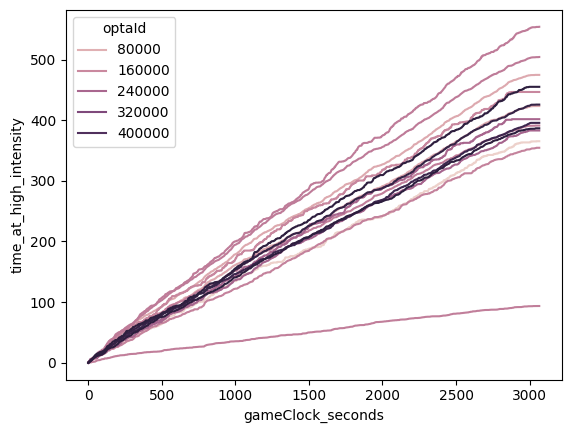

In [109]:
sns.lineplot(df_traj, x='gameClock_seconds', y='time_at_high_intensity', hue='optaId')

In [110]:
df_traj

,optaId,gameClock_seconds,time_at_high_intensity
0,14772,0,0.000000
1,14772,1,0.333333
2,14772,2,0.333333
3,14772,3,0.666667
4,14772,4,0.666667
...,...,...,...
46000,463306,3062,386.625000
46001,463306,3063,386.625000
46002,463306,3064,386.625000
46003,463306,3065,386.625000
